In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")
plt.style.use("seaborn")

In [ ]:
def get_gaps(data):
  return data.isnull().sum()[data.isnull().sum() > 0]

In [ ]:
def glob_reset():
  data = pd.read_csv("drive/MyDrive/data for colab/Life_train.csv")
  data.rename(columns=lambda column_name: column_name.strip(), inplace=True)
  return data

In [ ]:
data = glob_reset()

In [ ]:
data.head(5)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [ ]:
data.shape

(2489, 20)

In [ ]:
data.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
gaps = data.isnull().sum()[data.isnull().sum() > 0]
gaps

Alcohol                            167
Hepatitis B                        480
BMI                                 28
Polio                               18
Total expenditure                  196
Diphtheria                          18
GDP                                386
Population                         554
thinness  1-19 years                28
thinness 5-9 years                  28
Income composition of resources    146
Schooling                          146
dtype: int64

<Axes: >

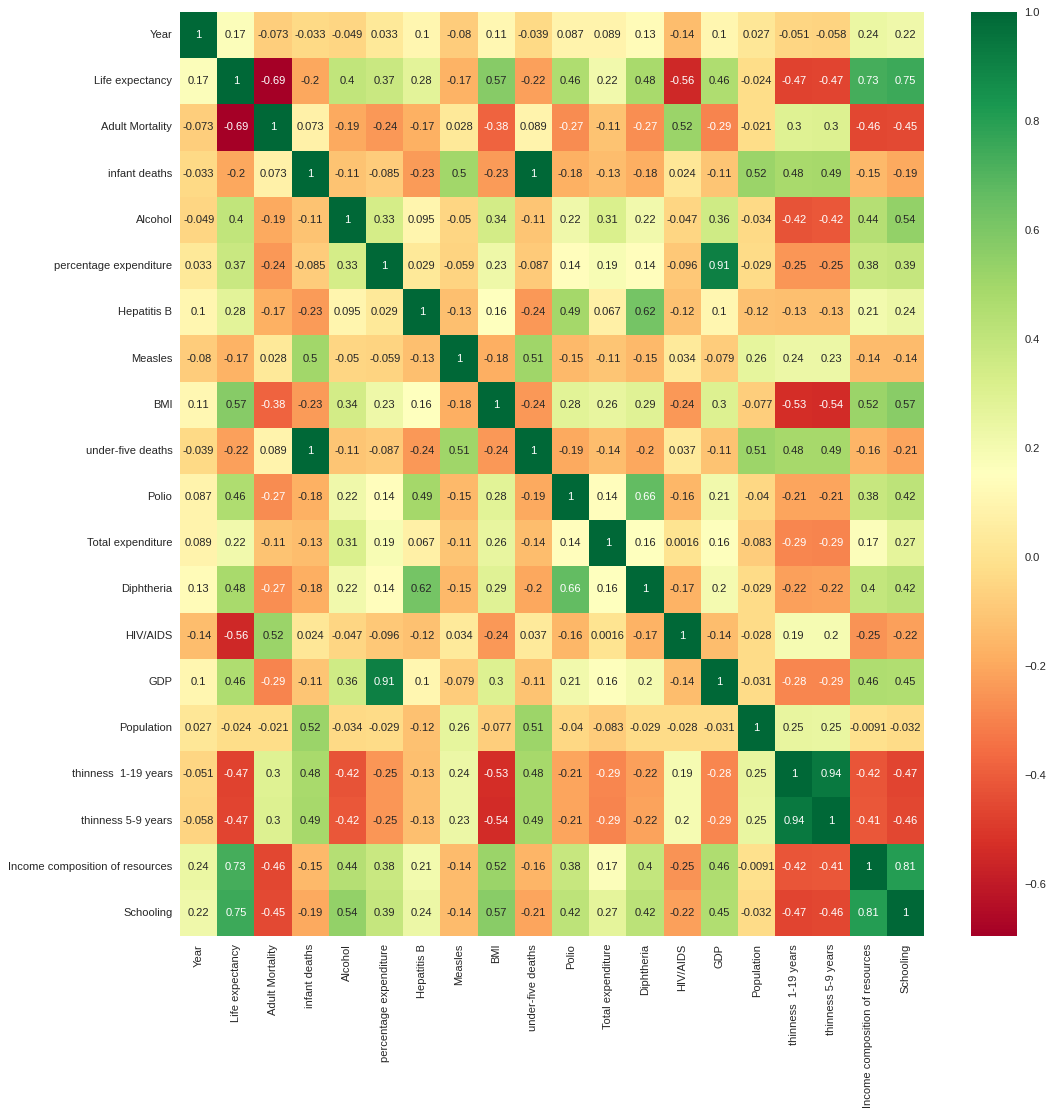

In [ ]:
plt.figure(figsize=(15, 15), dpi=80)
sns.heatmap(data.corr(), cmap="RdYlGn", annot=True)

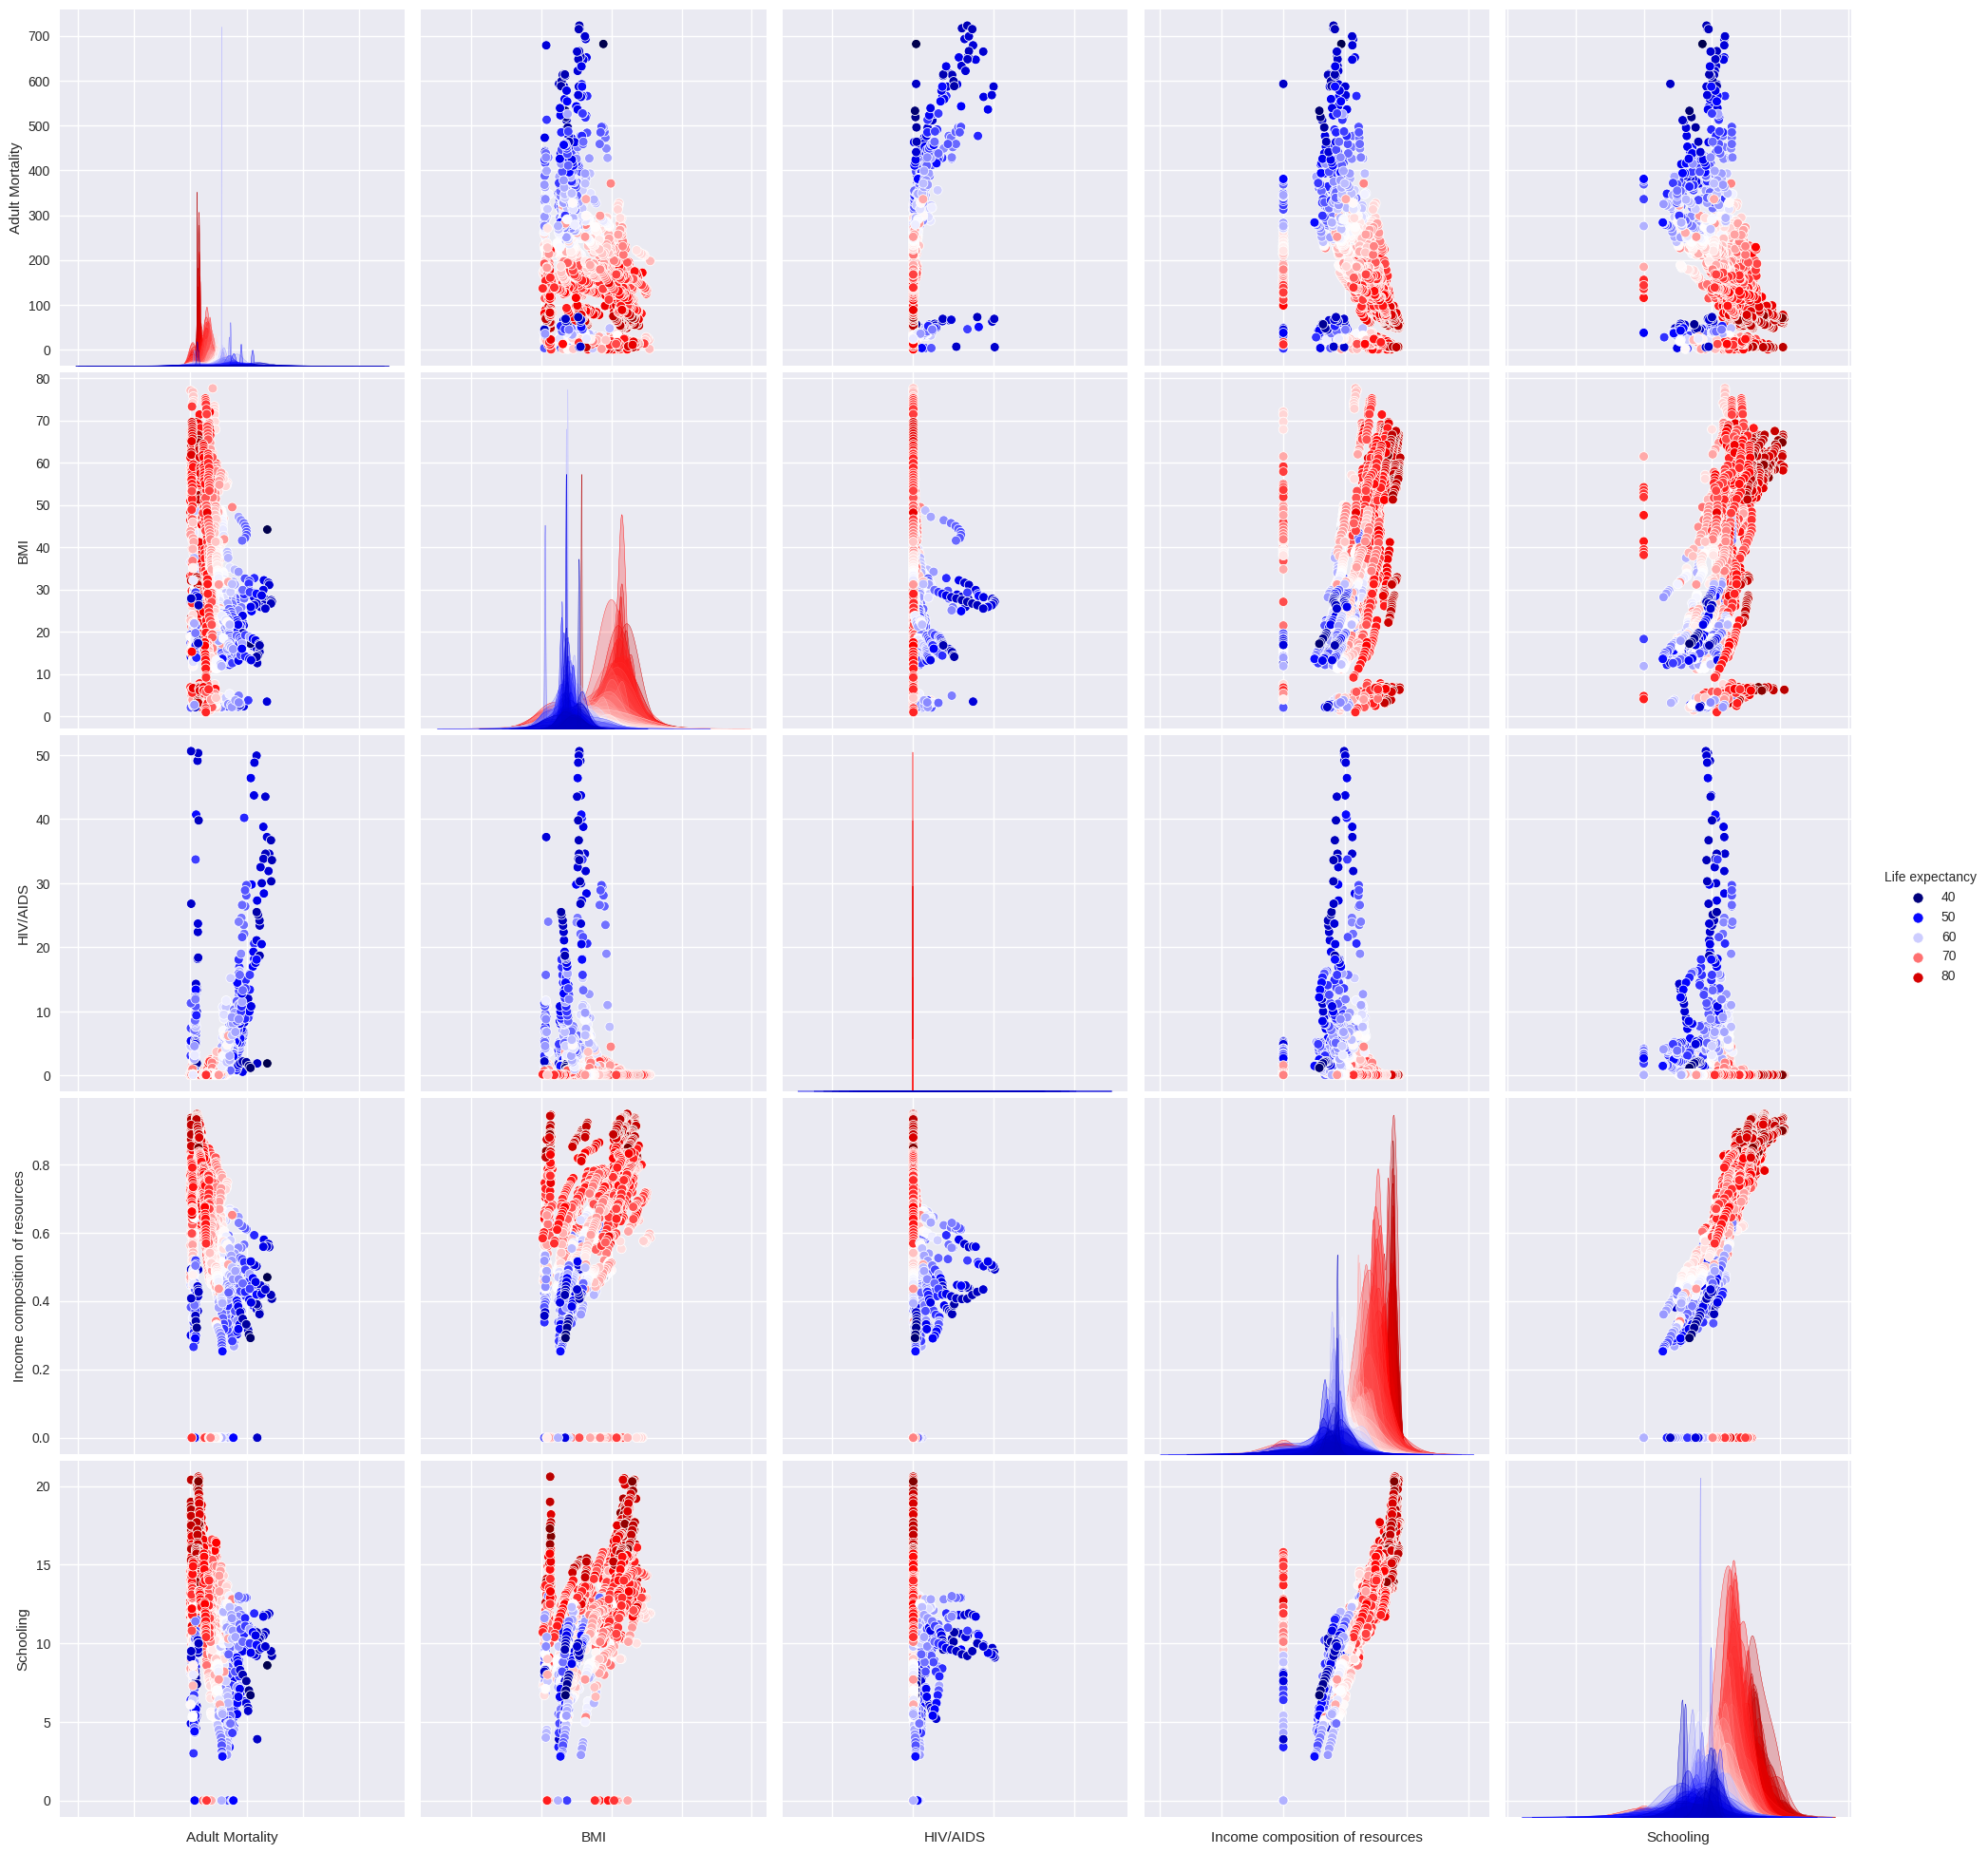

In [ ]:
g = sns.pairplot(
    data[["Life expectancy", "Adult Mortality", "BMI",
          "HIV/AIDS", "Income composition of resources", "Schooling"]],
    hue="Life expectancy",
    palette="seismic",
    size=4,
    diag_kind="kde",
    diag_kws=dict(shade=True),
    plot_kws=dict(s=50),
)
g.set(xticklabels=[]);

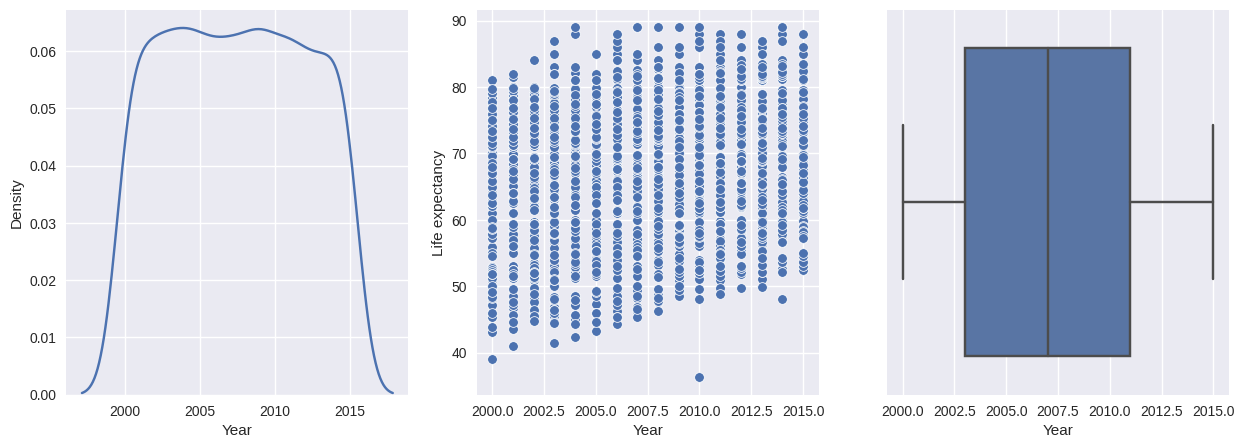

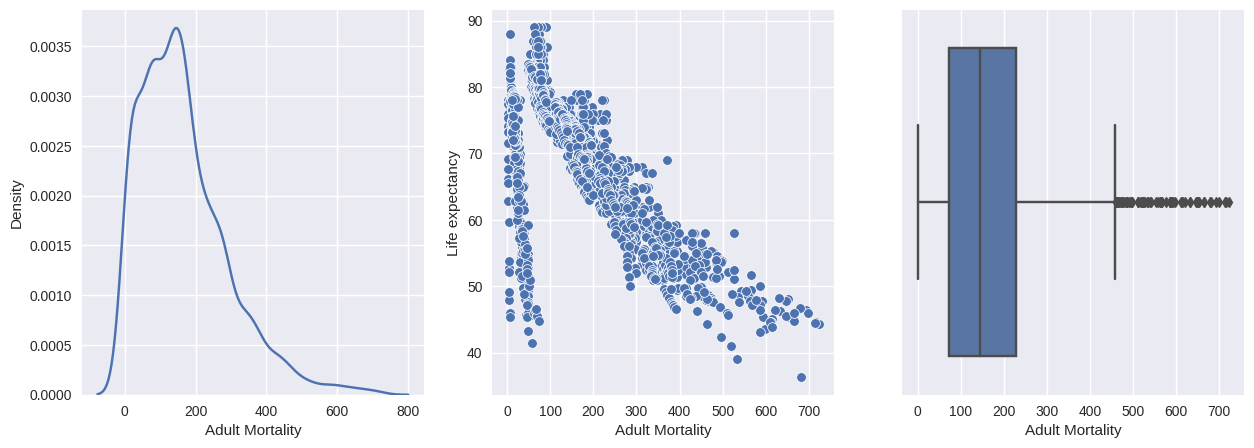

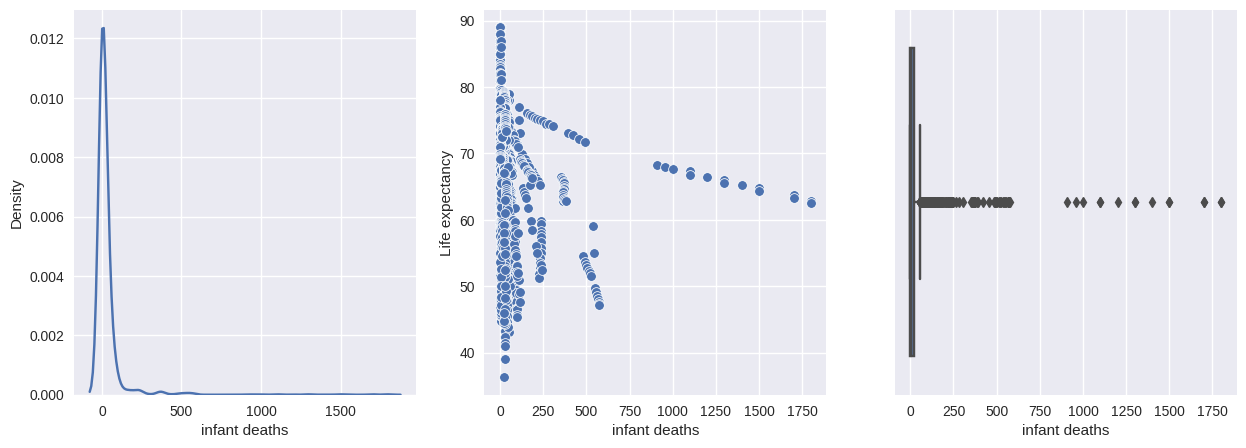

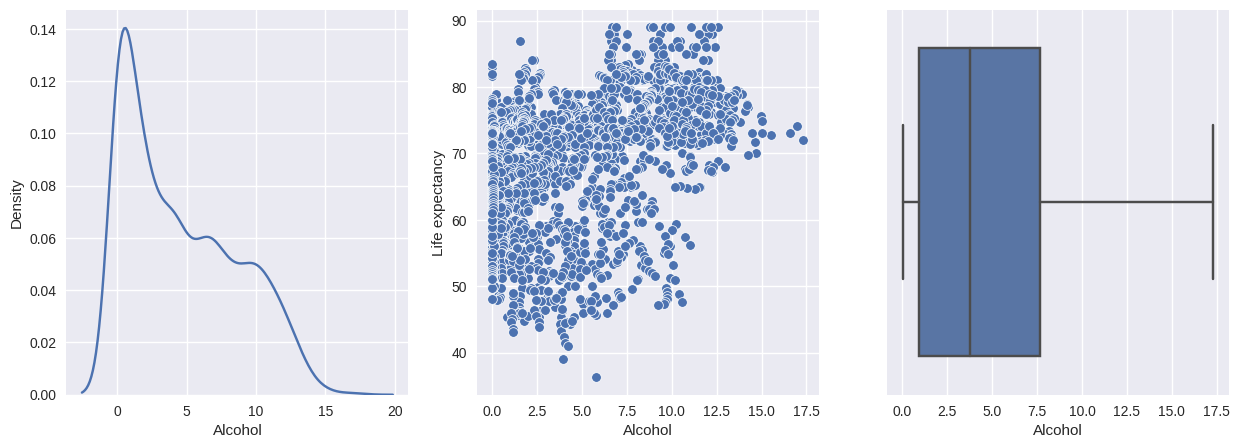

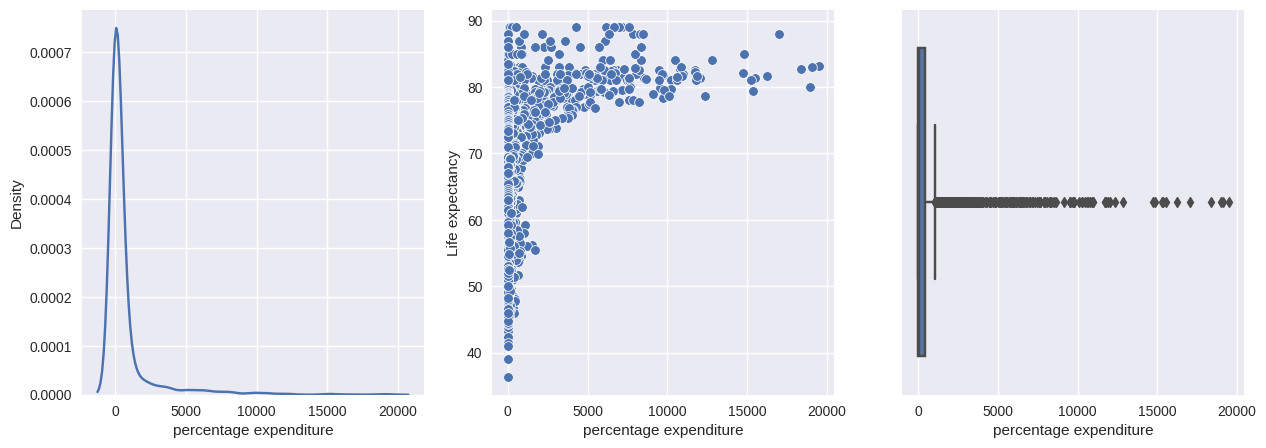

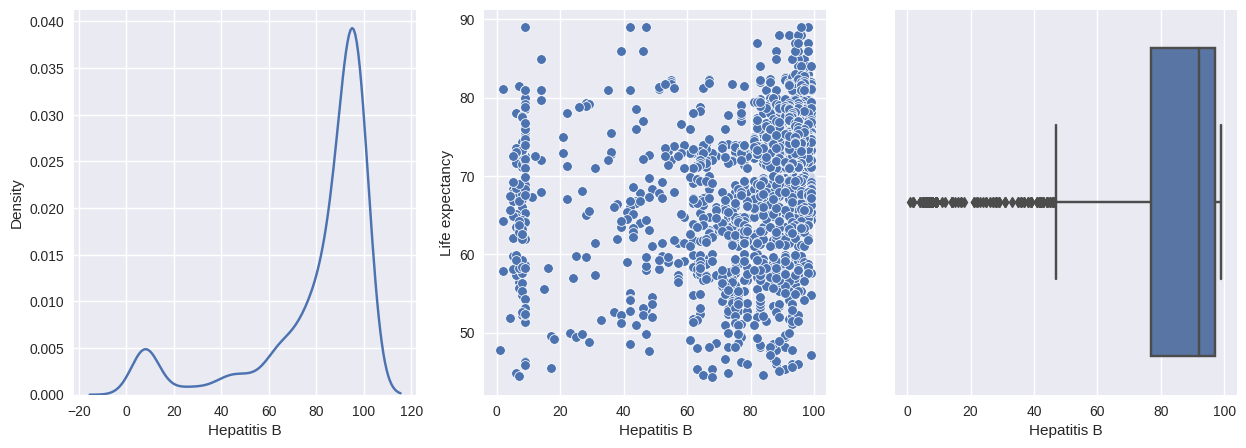

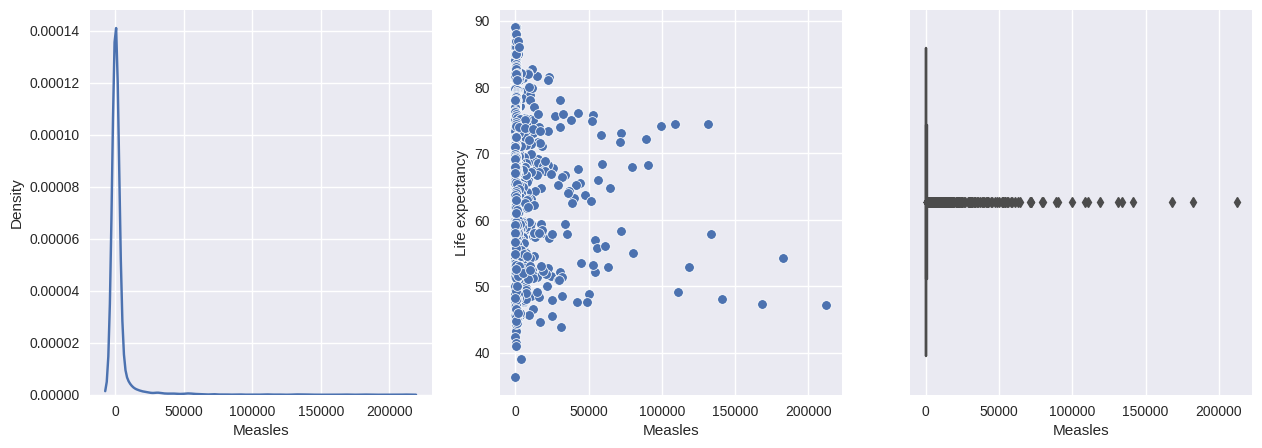

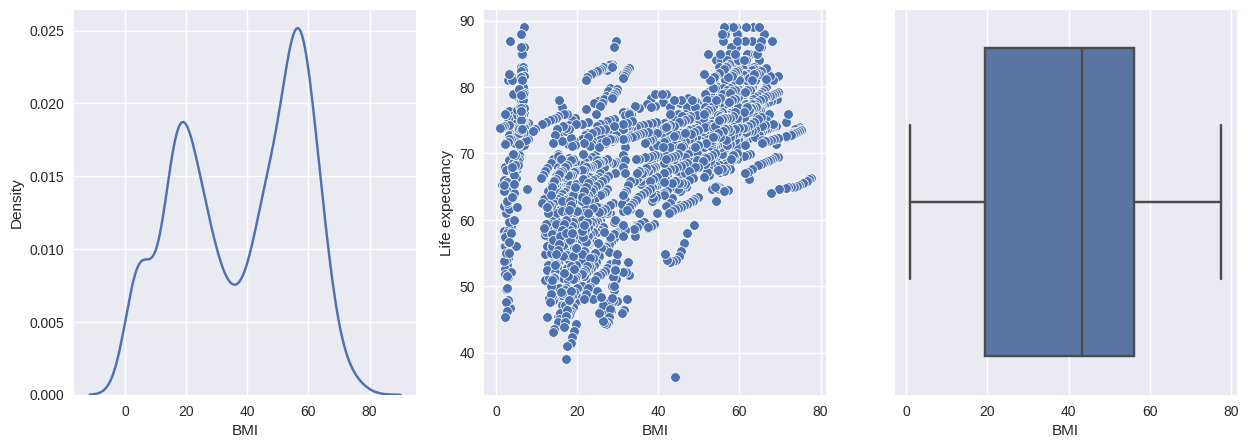

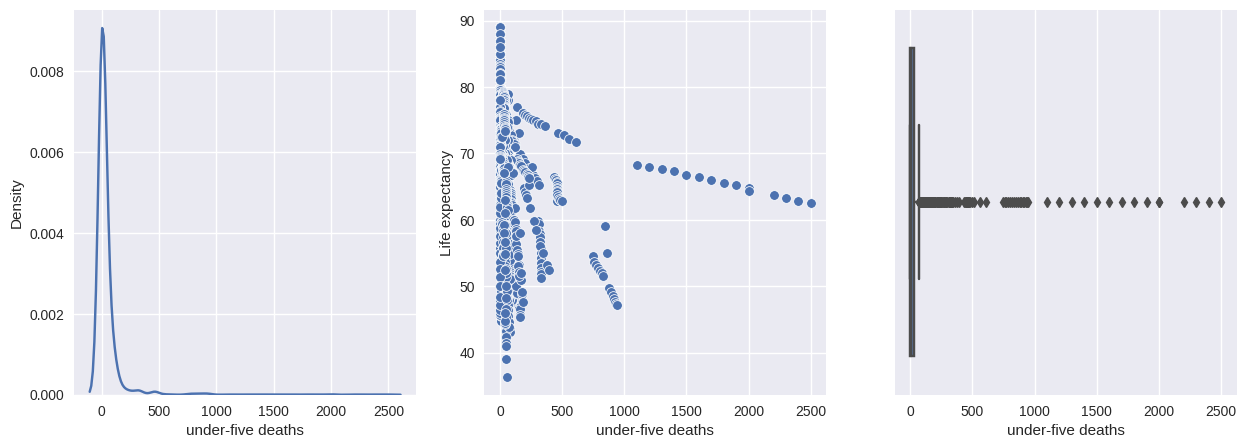

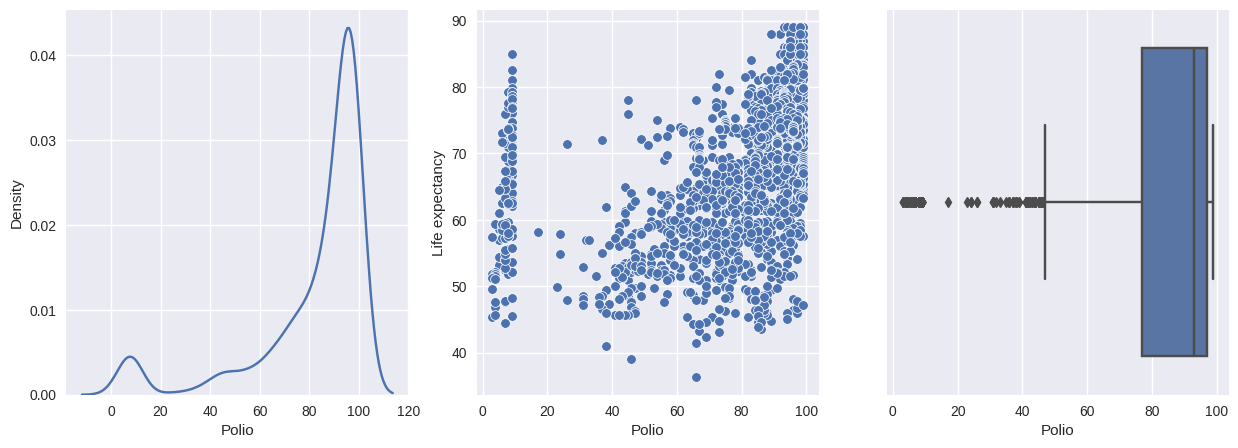

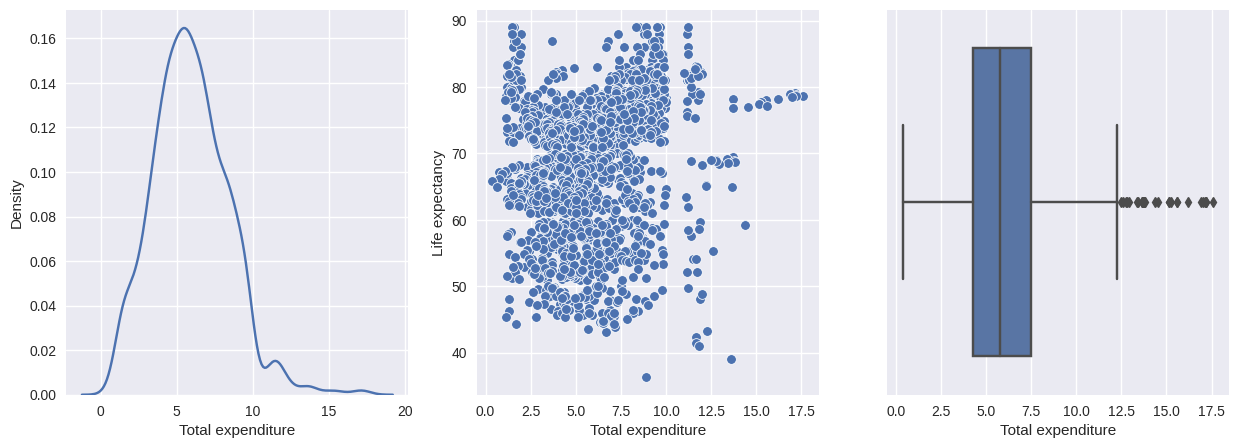

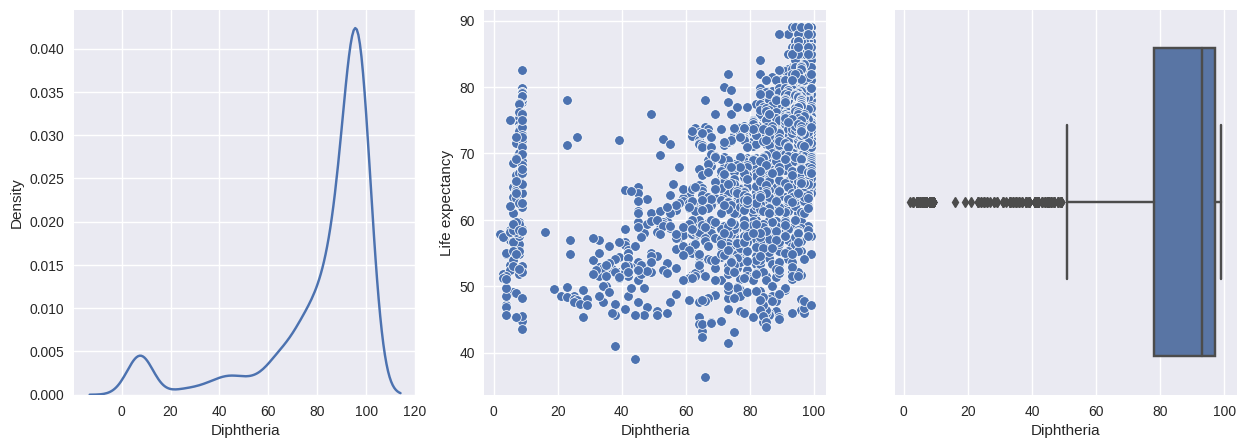

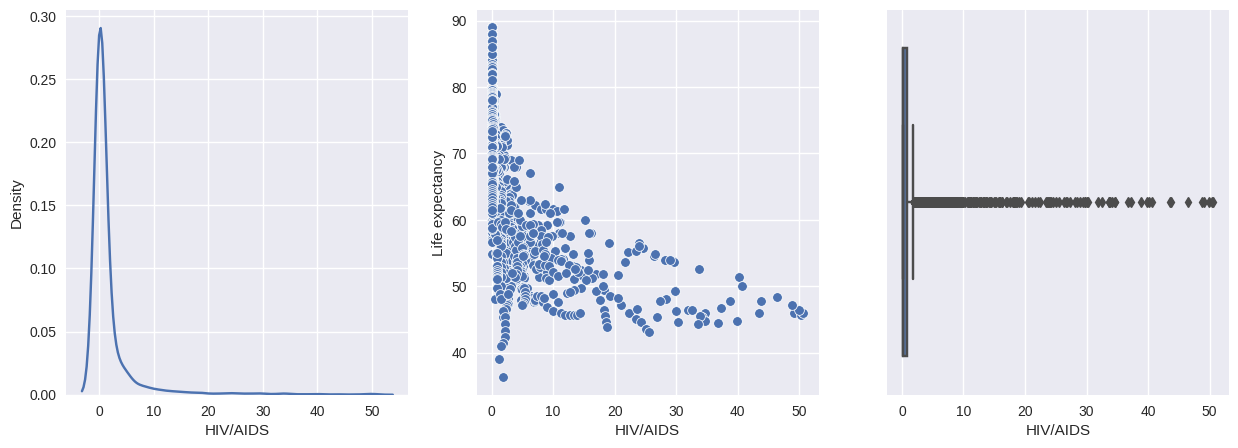

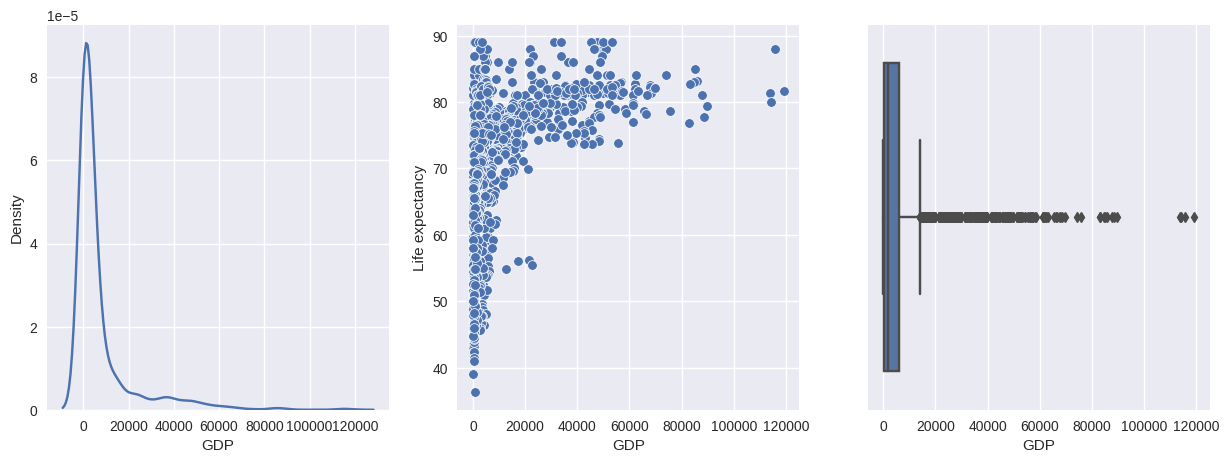

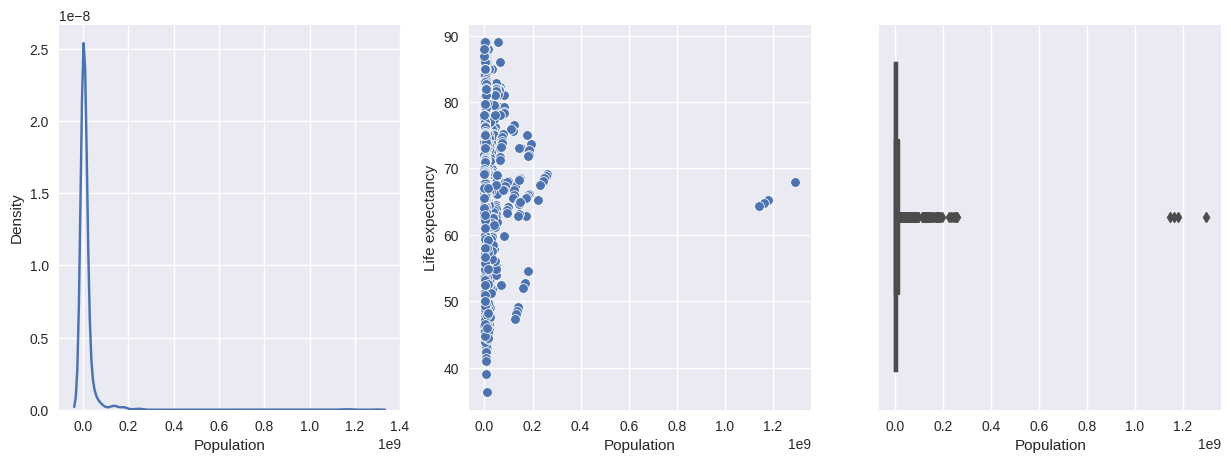

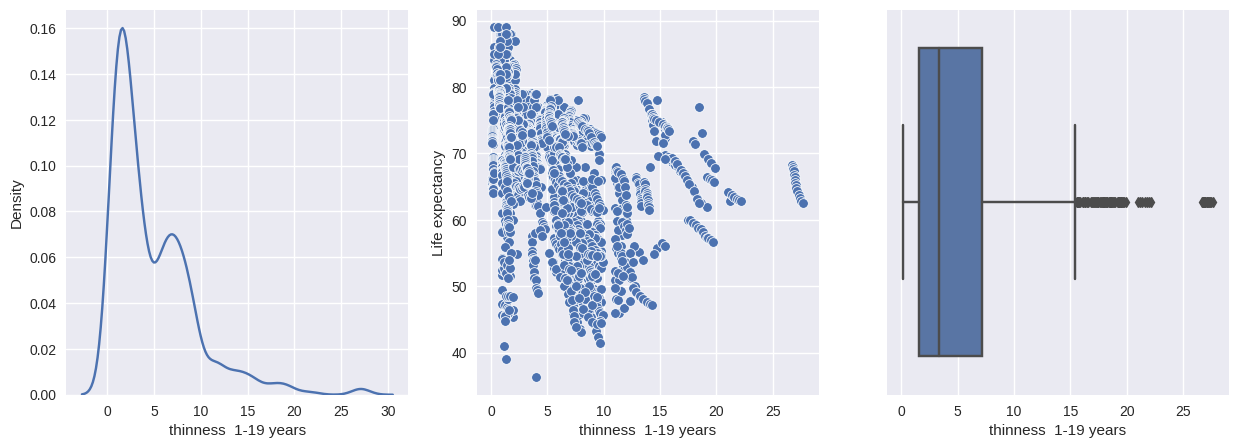

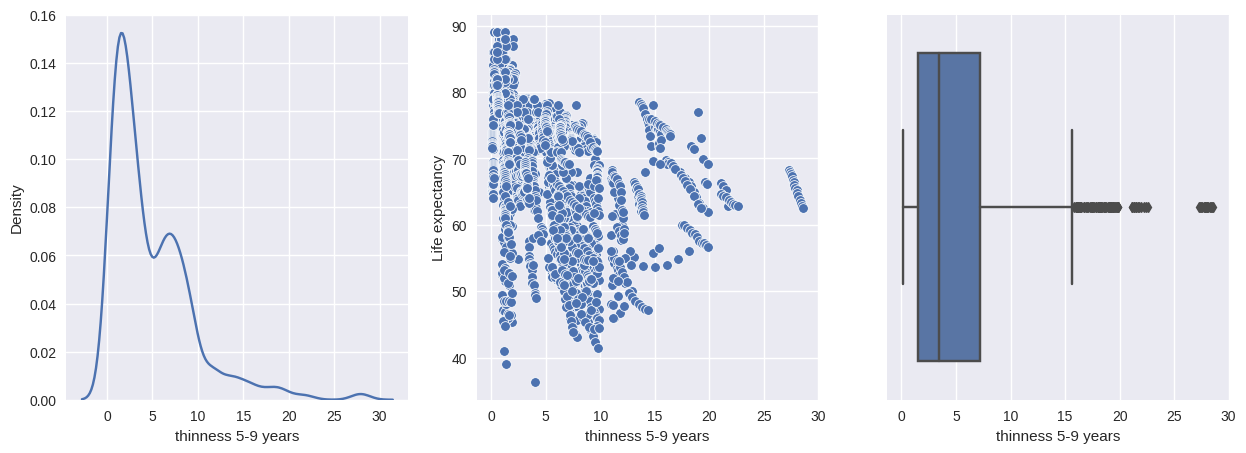

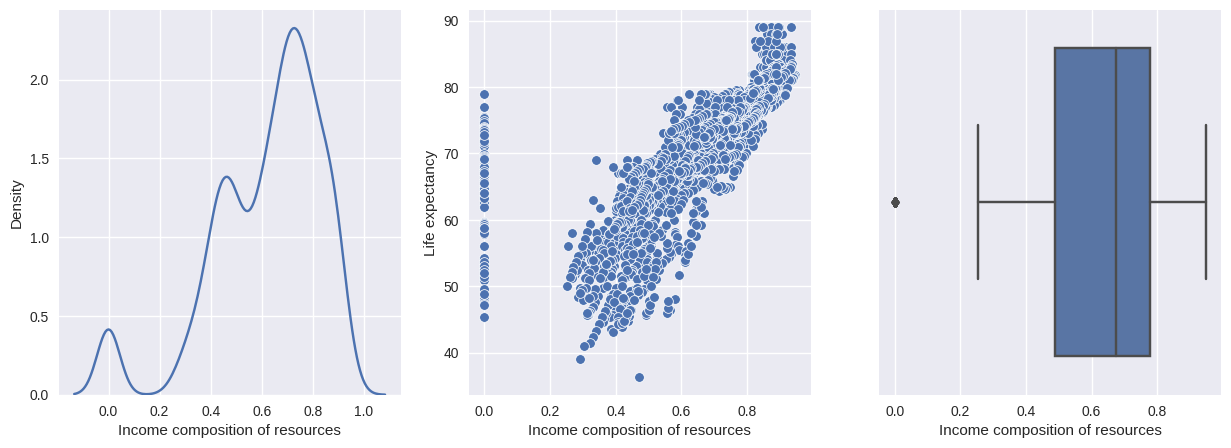

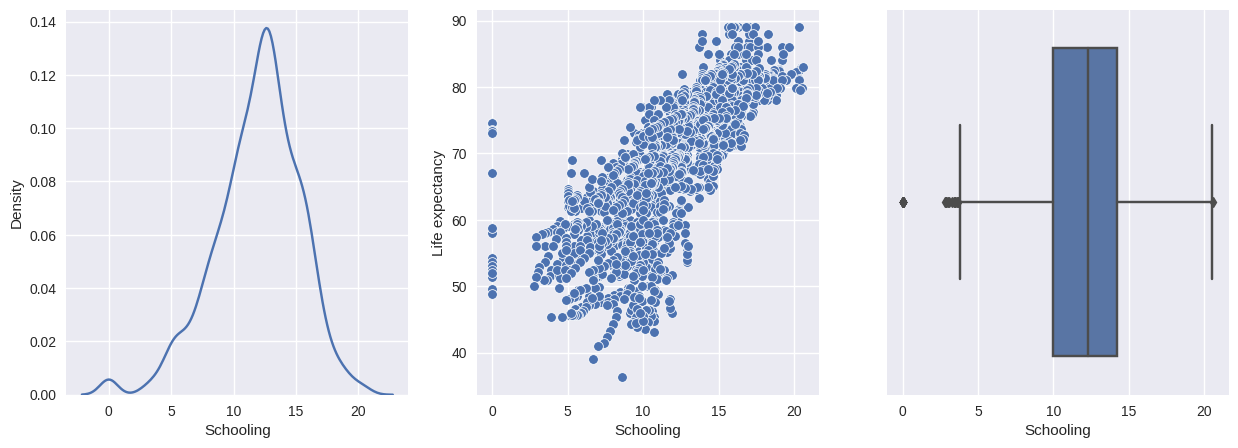

In [ ]:
for empty_data_column in data.columns.drop("Life expectancy"):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
  sns.kdeplot(data[empty_data_column], ax=ax1)
  sns.scatterplot(data=data, x=empty_data_column, y="Life expectancy", ax=ax2)
  sns.boxplot(x=data[empty_data_column], ax=ax3)
  plt.show()

# Попытки

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def get_results(data, target):
  X, y = data.drop(columns=[target]), data[target]

  std = StandardScaler()
  model = LinearRegression()

  X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=42)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  return metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)

In [ ]:
data = glob_reset()
gaps = get_gaps(data)

for empty_data_column in gaps.keys():
  data[empty_data_column].fillna(data[empty_data_column].mean(), inplace=True)

mse, r2 = get_results(data, "Life expectancy")
print("MSE: ", mse)
print("R2 Score:", r2)

MSE:  17.23996752352588
R2 Score: 0.8221213292566134


In [ ]:
data = glob_reset()
gaps = get_gaps(data)

for empty_data_column in gaps.keys():
  data[empty_data_column].fillna(data[empty_data_column].mode()[0], inplace=True)

mse, r2 = get_results(data, "Life expectancy")
print("MSE", mse)
print("R2 Score:", r2)

MSE 16.96262825227242
R2 Score: 0.8249828625424612


In [ ]:
data = glob_reset()
gaps = get_gaps(data)

for empty_data_column in gaps.keys():
  data[empty_data_column].interpolate(method="linear", direction="forward", inplace=True)

mse, r2 = get_results(data, "Life expectancy")
print("MSE", mse)
print("R2 Score:", r2)

MSE 17.81065823998433
R2 Score: 0.8162330521522225


In [ ]:
data = glob_reset()
data.drop(columns=["Population"], inplace=True)
gaps = get_gaps(data)

for empty_data_column in gaps.keys():
  data[empty_data_column].fillna(data[empty_data_column].mode()[0], inplace=True)

mse, r2 = get_results(data, "Life expectancy")
print("MSE", mse)
print("R2 Score:", r2)

MSE 16.96573865838677
R2 Score: 0.8249507699701094


In [ ]:
data = glob_reset()
data = data[["Life expectancy", "Adult Mortality", "BMI",
             "HIV/AIDS", "Income composition of resources", "Schooling"]]
gaps = get_gaps(data)

data = data[(data["Adult Mortality"] > 100) & (data["HIV/AIDS"] > 0) &
            (data["Income composition of resources"] > 0) &
            (data["Schooling"] > 0)]

for empty_data_column in gaps.keys():
  data[empty_data_column].fillna(data[empty_data_column].mode()[0], inplace=True)

mse, r2 = get_results(data, "Life expectancy")
print("MSE", mse)
print("R2 Score:", r2)

MSE 5.7039351478839695
R2 Score: 0.9225727174473908


In [ ]:
data = glob_reset()
data = data[["Life expectancy", "Adult Mortality", "BMI",
             "HIV/AIDS", "Income composition of resources", "Schooling"]]
data = data[(data["Adult Mortality"] > 100) & (data["HIV/AIDS"] > 0) &
            (data["Income composition of resources"] > 0) &
            (data["Schooling"] > 0)]
gaps = get_gaps(data)

for empty_data_column in gaps.keys():
  data[empty_data_column].fillna(data[empty_data_column].mean(), inplace=True)

mse, r2 = get_results(data, "Life expectancy")
print("MSE", mse)
print("R2 Score:", r2)

MSE 5.6989002415512635
R2 Score: 0.9226410630903795


In [ ]:
data = glob_reset()
data = data[["Life expectancy", "Adult Mortality", "BMI",
             "HIV/AIDS", "Income composition of resources", "Schooling"]]

for empty_data_column in get_gaps(data).keys():
  data[empty_data_column].fillna(data[empty_data_column].mode()[0], inplace=True)

adult_mortality_bin = pd.cut(data["Adult Mortality"], 3)
data["Adult_Mortality_Bin_Code"] = LabelEncoder().fit_transform(adult_mortality_bin)

schooling_bin = pd.cut(data["Schooling"], 3)
data["Schooling_Bin_Code"] = LabelEncoder().fit_transform(schooling_bin)

ICOR_bin = pd.qcut(data["Income composition of resources"], 6)
data["ICOR_Bin_Code"] = LabelEncoder().fit_transform(ICOR_bin)

BMI_bin = pd.cut(data["BMI"], 3)
data["BMI_Bin_Code"] = LabelEncoder().fit_transform(BMI_bin)

HIV_AIDS_bin = pd.cut(data["HIV/AIDS"], 7)
data["HIV/AIDS_Bin_Code"] = LabelEncoder().fit_transform(HIV_AIDS_bin)

mse, r2 = get_results(data, "Life expectancy")
print("MSE", mse)
print("R2 Score:", r2)

MSE 15.08169402840883
R2 Score: 0.8443899802786188


# Результат

In [ ]:
data = pd.read_csv("drive/MyDrive/data for colab/Life_train.csv")
data.rename(columns=lambda column_name: column_name.strip(), inplace=True)

for empty_data_column in get_gaps(data).keys():
  data[empty_data_column].fillna(data[empty_data_column].mode()[0], inplace=True)

X, y = data.drop(columns=["Life expectancy"]), data["Life expectancy"]

std = StandardScaler()
model = LinearRegression()

X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)

model.fit(X_std, y)

LinearRegression()

In [ ]:
data = pd.read_csv("drive/MyDrive/data for colab/Life_test.csv")
data.rename(columns=lambda column_name: column_name.strip(), inplace=True)

std = StandardScaler()
data = pd.DataFrame(std.fit_transform(data), columns=data.columns)
for empty_data_column in get_gaps(data).keys():
  data[empty_data_column].fillna(data[empty_data_column].mode()[0], inplace=True)

y_pred = model.predict(data)
ans = pd.DataFrame({"index": np.arange(len(y_pred)), "Life expectancy": y_pred})
ans.to_csv('ans5.csv', index=False)